# Jupyter Notebook
Let's play around with it!

# Distance Matrix

In [1]:
# imports
from sklearn import datasets

In [2]:
# abstract
dataset = datasets.load_iris()

In [3]:
# dictionary
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
dataset["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
data = dataset["data"]
data  # data is a numpy array data structure. Think of it as a matrix of data (or as an excel spreadsheet)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
data.shape

(150, 4)

In [13]:
# euclidean distance of 2 observations
sum((data[0] - data[1]) ** 2) ** 1/2

0.14499999999999985

In [8]:
# initialize distance matrix. What will be its final shape?
dist = []

In [9]:
# Build the distance matrix. Use 2 for loops, the append list method and the euclidean distance formula
for i in range(data.shape[0]):
    dist_row = []
    for j in range(data.shape[0]):
        single_dist = sum((data[i] - data[j]) ** 2) ** 1/2
        dist_row.append(single_dist)
    dist.append(dist_row)        

In [10]:
dist

[[0.0,
  0.14499999999999985,
  0.12999999999999973,
  0.20999999999999996,
  0.009999999999999974,
  0.19000000000000017,
  0.135,
  0.014999999999999982,
  0.42499999999999954,
  0.10999999999999982,
  0.07000000000000026,
  0.06999999999999999,
  0.17499999999999996,
  0.4949999999999998,
  0.3900000000000001,
  0.6100000000000007,
  0.15000000000000013,
  0.0049999999999999975,
  0.2750000000000003,
  0.05499999999999996,
  0.09500000000000024,
  0.04500000000000005,
  0.20999999999999996,
  0.11000000000000004,
  0.17499999999999996,
  0.15000000000000002,
  0.05000000000000002,
  0.010000000000000061,
  0.010000000000000061,
  0.1449999999999998,
  0.14499999999999996,
  0.07500000000000023,
  0.19499999999999987,
  0.3250000000000003,
  0.10499999999999982,
  0.0699999999999999,
  0.08500000000000013,
  0.029999999999999867,
  0.3749999999999995,
  0.010000000000000018,
  0.01499999999999995,
  0.91,
  0.29499999999999943,
  0.10499999999999998,
  0.18999999999999995,
  0.174999

In [11]:
# another import (usually all imports are done at the top of the script/ notebook)
import seaborn as sns

<AxesSubplot:>

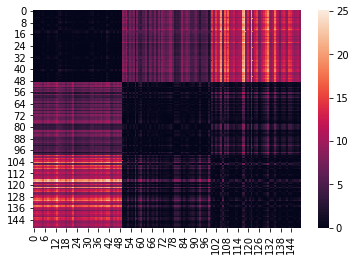

In [12]:
sns.heatmap(dist)

# Stepping back: 
### How can we represent an observation in a N-dimensional Space

In [48]:
import matplotlib.pyplot as plt

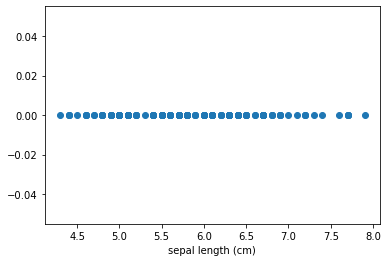

In [68]:
plt.scatter(data[:, 0], [0 for i in range(data.shape[0])])
plt.xlabel(dataset["feature_names"][0])
plt.show()

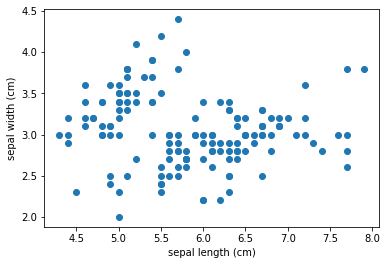

In [73]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel(dataset["feature_names"][0])
plt.ylabel(dataset["feature_names"][1])
plt.show()

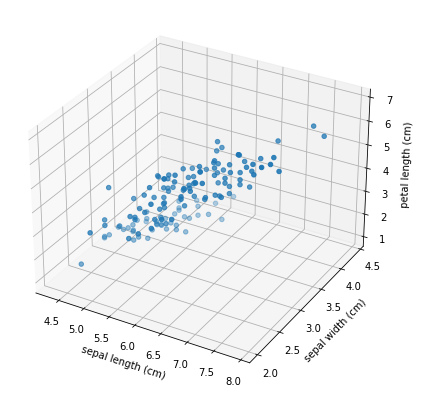

In [76]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
ax.set_xlabel(dataset["feature_names"][0])
ax.set_ylabel(dataset["feature_names"][1])
ax.set_zlabel(dataset["feature_names"][2])
plt.show()

# Finding the 2 closest observations

In [43]:
min_val = 999  # really large number
min_idx = []
for row_idx, row in enumerate(dist):
    starting_point = row_idx + 1  # only look at upper triangle
    for val_idx, val in enumerate(row[starting_point:]):
#         print(row_idx, val_idx, val)  # understand what is going on
        if val < min_val:
            min_val = val
            min_idx = [row_idx, starting_point + val_idx]  # why starting_point + val_idx?

print(min_idx, min_val)

[101, 142] 0.0


In [45]:
data[101]

array([5.8, 2.7, 5.1, 1.9])

In [46]:
data[142]

array([5.8, 2.7, 5.1, 1.9])